In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import train_test_split
import scipy as sp
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [12]:
df = pd.read_excel('D:/大学/UIUC/first semester/machine learning 1/module4/housing.xlsx')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df=df.dropna(how='any',axis=0)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [181]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,1.420825,12.721239,10.304889,0.077434,0.540816,6.343538,65.557965,4.043570,7.823009,377.442478,18.247124,369.826504,11.441881,23.750442
std,2.495894,24.326032,6.797103,0.267574,0.113816,0.666808,28.127025,2.090492,7.543494,151.327573,2.200064,68.554439,6.156437,8.808602
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,6.300000
25%,0.069875,0.000000,4.930000,0.000000,0.447000,5.926750,40.950000,2.354750,4.000000,276.750000,16.800000,377.717500,6.587500,18.500000
50%,0.191030,0.000000,8.140000,0.000000,0.519000,6.229000,71.800000,3.550400,5.000000,307.000000,18.600000,392.080000,10.250000,21.950000
75%,1.211460,20.000000,18.100000,0.000000,0.605000,6.635000,91.625000,5.401100,7.000000,411.000000,20.200000,396.157500,15.105000,26.600000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.410000,50.000000


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     452 non-null    float64
 1   ZN       452 non-null    float64
 2   INDUS    452 non-null    float64
 3   CHAS     452 non-null    float64
 4   NOX      452 non-null    float64
 5   RM       452 non-null    float64
 6   AGE      452 non-null    float64
 7   DIS      452 non-null    float64
 8   RAD      452 non-null    int64  
 9   TAX      452 non-null    float64
 10  PTRATIO  452 non-null    float64
 11  B        452 non-null    float64
 12  LSTAT    452 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 73.0 KB


D:\phython\envs\python3point5\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


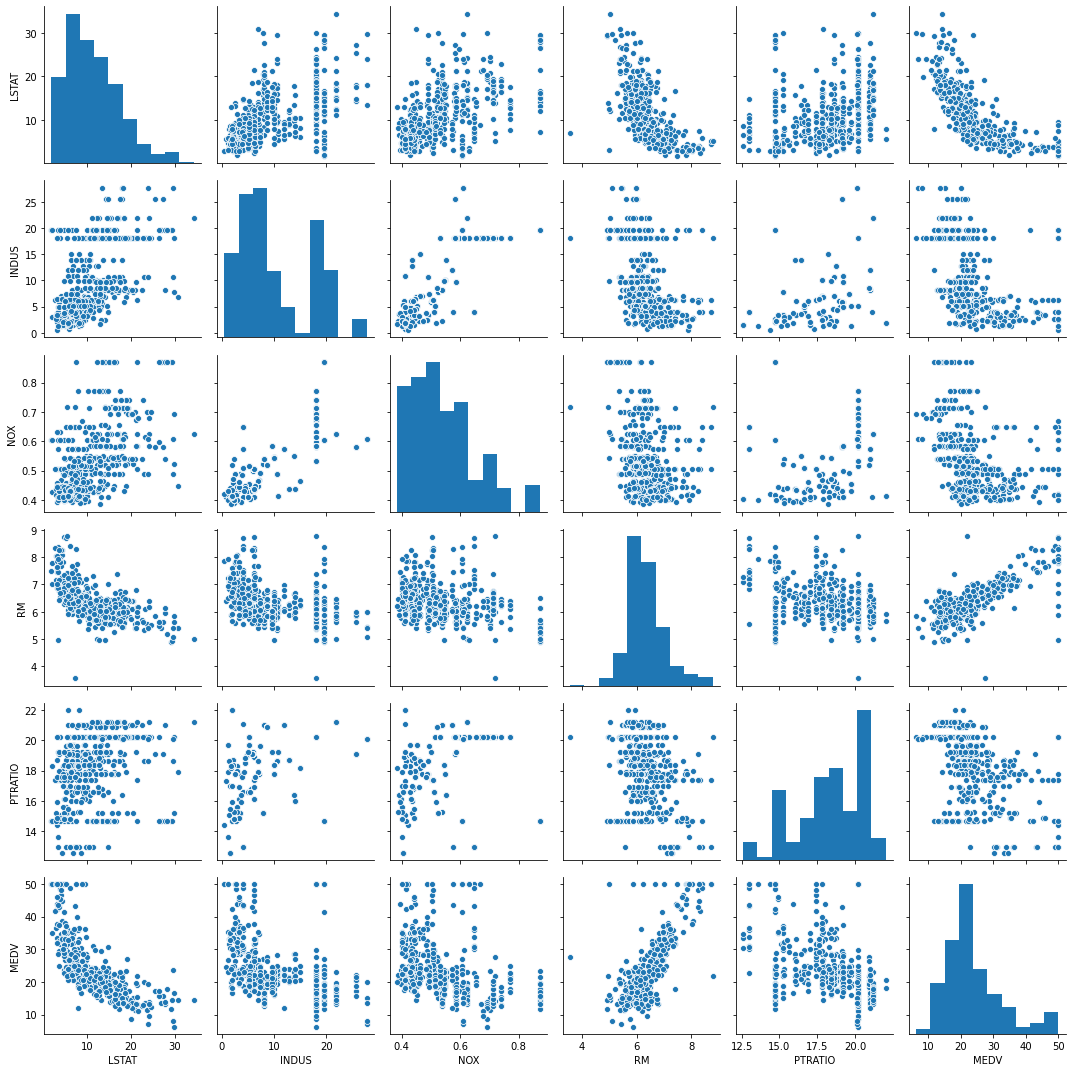

In [200]:
# Visualizing the important characteristics of a dataset
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'PTRATIO','MEDV']
sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
# plt.savefig('images/10_03.png', dpi=300)
plt.show()

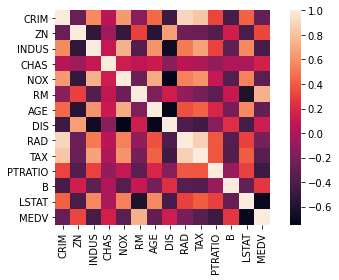

In [198]:
#show heatmap
cm = np.corrcoef(df.values.T)
#sns.set(font_scale=1.5)
hm = sns.heatmap(cm,cbar=True,square=True,fmt='.2f',annot=False,yticklabels=df.columns,xticklabels=df.columns,
                 annot_kws={'size': 15})

plt.tight_layout()
# plt.savefig('images/10_04.png', dpi=300)
plt.show()

In [50]:
#data
X = df[['RM']].values
y = df['MEDV'].values
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

Slope: 9.778
Intercept: -38.276


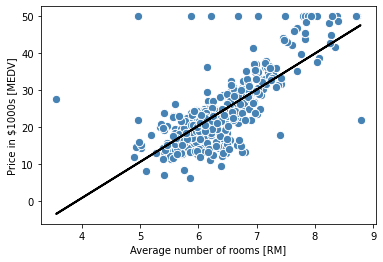

In [51]:
# Estimating the coefficient of a regression model via scikit-learn
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
#plt.savefig('images/10_07.png', dpi=300)
plt.show()

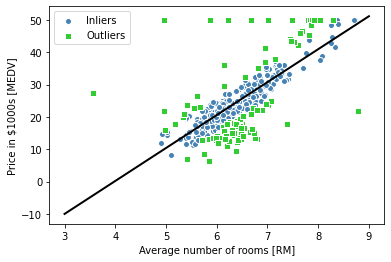

Slope: 10.194
Intercept: -40.602


In [19]:
# Fitting a robust regression model using RANSAC
ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=50, 
                         loss='absolute_loss', 
                         residual_threshold=5.0, 
                         random_state=0)
ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)   
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')

#plt.savefig('images/10_08.png', dpi=300)
plt.show()
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

In [83]:
#part2: data 
X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

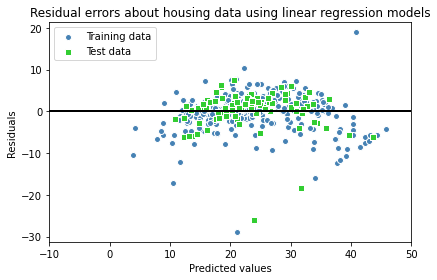

Slope:  -0.211 0.030 0.052 1.786 -11.626 5.318 -0.021 -1.340 0.249 -0.009 -0.878 0.014 -0.479  
Intercept: 20.400
MSE train: 20.042, test: 20.975
R^2 train: 0.747, test: 0.698


In [205]:
# Evaluating the performance of linear regression models
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.title('Residual errors about housing data using linear regression models')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

print('Slope: ' ,end=' ')
for i in range(13):
    print('%.3f' % slr.coef_[i],end=' ')
print(' ')
print('Intercept: %.3f' % slr.intercept_)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))


In [158]:
# part 3: Ridge regression(codes in textbook)
ridge = Ridge(alpha=1.0)
#ridge = Ridge(alpha=1.0,normalize=True)
ridge.fit(X_train,y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred=ridge.predict(X_test)
score=ridge.score(X_test,y_test)
#print(score)

print('Slope: ' ,end=' ')
for i in range(13):
    print('%.3f' % ridge.coef_[i],end=' ')
print(' ')
print('Intercept: %.3f' % ridge.intercept_)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))


Slope:  -0.267 0.032 0.029 1.673 -6.086 5.359 -0.025 -1.264 0.249 -0.010 -0.812 0.014 -0.484  
Intercept: 16.342
MSE train: 20.136, test: 21.033
R^2 train: 0.746, test: 0.697


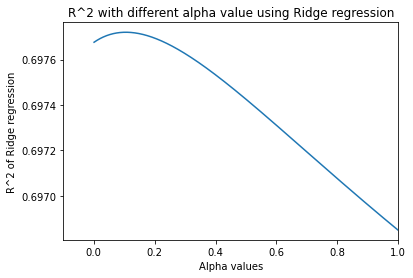

Ridge:Best alpha= 0.105  R^2= 0.698


In [176]:
#Test the best alpha for Ridge regression
begin=0.001
end=1
krange=np.arange(begin,end,0.001)
testscores=[]
trainscores=[]
for k in krange:
    ridge = Ridge(alpha=k)
    ridge.fit(X_train,y_train)
    y_train_pred = ridge.predict(X_train)
    y_test_pred=ridge.predict(X_test)
    score=ridge.score(X_test,y_test)
    testscores.append(ridge.score(X_test,y_test))
    trainscores.append(ridge.score(X_train,y_train))
#print best alpha and R^2
maxridge=max(testscores)
max_index=testscores.index(maxridge)
best_alpha=max_index/1000+begin

plt.plot(krange, testscores)
plt.xlabel('Alpha values')
plt.ylabel('R^2 of Ridge regression')
plt.title('R^2 with different alpha value using Ridge regression')
plt.xlim([-0.1, 1])
plt.show()

print('Ridge:Best alpha=',best_alpha,' R^2=','%.3f' %maxridge)

Performance of alpha= 0.105 :
Slope:  -0.222 0.031 0.048 1.770 -10.608 5.330 -0.021 -1.326 0.249 -0.009 -0.866 0.014 -0.480  
Intercept: 19.619
MSE train: 20.046, test: 20.972
R^2 train: 0.747, test: 0.698


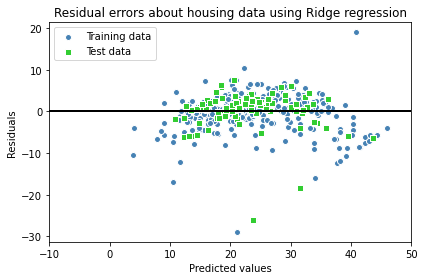

In [177]:
#output the performance with beat alpha in ridge regression
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train,y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred=ridge.predict(X_test)

#print slope & intercept
print('Performance of alpha=',best_alpha,':')
print('Slope: ' ,end=' ')
for i in range(13):
    print('%.3f' % ridge.coef_[i],end=' ')
print(' ')
print('Intercept: %.3f' % ridge.intercept_)

#print MSE & R^2
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

#plot residual errors
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.title('Residual errors about housing data using Ridge regression')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

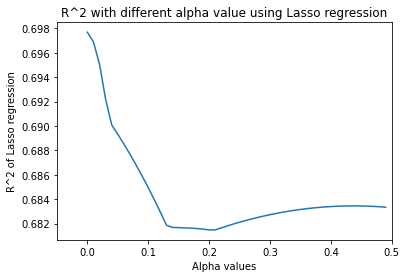

Lasso:Best alpha= 1e-06  R^2= 0.698


In [201]:
# LASSO regression: test the best alpha
begin=0.000001
end=0.5
krange=np.arange(begin,end,0.01)
testscores=[]
trainscores=[]
for k in krange:
    lasso = Lasso(alpha=k)
    lasso.fit(X_train,y_train)
    y_train_pred = lasso.predict(X_train)
    y_test_pred=lasso.predict(X_test)
    score=lasso.score(X_test,y_test)
    testscores.append(lasso.score(X_test,y_test))
    trainscores.append(lasso.score(X_train,y_train))
    
#print best alpha and R^2
maxridge=max(testscores)
max_index=testscores.index(maxridge)
best_alpha=max_index/10000+begin

plt.plot(krange, testscores)
plt.xlabel('Alpha values')
plt.ylabel('R^2 of Lasso regression')
plt.title('R^2 with different alpha value using Lasso regression')
plt.xlim([-end/10, end])
plt.show()

print('Lasso:Best alpha=',best_alpha,' R^2=','%.3f' %maxridge)

Performance of alpha= 1e-06 :
Slope:  -0.211 0.030 0.052 1.786 -11.626 5.318 -0.021 -1.340 0.249 -0.009 -0.878 0.014 -0.479  
Intercept: 20.400
MSE train: 20.042, test: 20.975
R^2 train: 0.747, test: 0.698


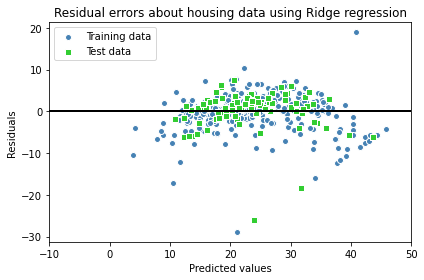

In [202]:
#output the performance with beat alpha in lasso regression
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred=lasso.predict(X_test)

#print slope & intercept
print('Performance of alpha=',best_alpha,':')
print('Slope: ' ,end=' ')
for i in range(13):
    print('%.3f' % lasso.coef_[i],end=' ')
print(' ')
print('Intercept: %.3f' % lasso.intercept_)

#print MSE & R^2
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

#plot residual errors
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.title('Residual errors about housing data using Ridge regression')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

In [180]:
# Elastic Net regression:
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)
elanet.fit(X_train,y_train)
elanet_pred=ridge.predict(X_test)
elanet.score(X_test,y_test)

0.6674324113714556

In [203]:
print("My name is Xin Zhang")
print("My NetID is: xzhan81")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Xin Zhang
My NetID is: xzhan81
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
